In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [15]:
DIRECTORY = './data/'
train = pd.read_csv(DIRECTORY + 'train.csv', parse_dates=['date'])
test = pd.read_csv(DIRECTORY + 'test.csv', parse_dates=['date'])

In [4]:
print("Train stores:", len(train['store'].unique()))
print("Train countries:", len(train['country'].unique()))   
print("Train product:", len(train['product'].unique()))
print("Train days:", len(train['date'].unique()))
print("Expected combined:",  len(train['store'].unique()) * len(train['country'].unique()) * \
                                len(train['product'].unique()) * len(train['date'].unique()))

print(len(train))

Train stores: 3
Train countries: 6
Train product: 5
Train days: 2557
Expected combined: 230130
230130


In [5]:
train['is_na'] = train['num_sold'].isna().astype(int)
na_combinations = train[train.isna().sum(axis=1).astype(bool)][['product', 'store', 'country']].value_counts()
na_combinations

product             store                 country
Holographic Goose   Discount Stickers     Canada     2557
                                          Kenya      2557
                    Stickers for Less     Kenya      1358
                                          Canada     1308
                    Premium Sticker Mart  Kenya       646
                                          Canada      380
Kerneler            Discount Stickers     Kenya        63
                                          Canada        1
Kerneler Dark Mode  Discount Stickers     Kenya         1
Name: count, dtype: int64

In [6]:
for product, store, country in na_combinations.index:
    print(product, store, country)
    display(train[(train['product'] == product) & (train.store == store) & (train.country == country)]['is_na'].value_counts())

Holographic Goose Discount Stickers Canada


is_na
1    2557
Name: count, dtype: int64

Holographic Goose Discount Stickers Kenya


is_na
1    2557
Name: count, dtype: int64

Holographic Goose Stickers for Less Kenya


is_na
1    1358
0    1199
Name: count, dtype: int64

Holographic Goose Stickers for Less Canada


is_na
1    1308
0    1249
Name: count, dtype: int64

Holographic Goose Premium Sticker Mart Kenya


is_na
0    1911
1     646
Name: count, dtype: int64

Holographic Goose Premium Sticker Mart Canada


is_na
0    2177
1     380
Name: count, dtype: int64

Kerneler Discount Stickers Kenya


is_na
0    2494
1      63
Name: count, dtype: int64

Kerneler Discount Stickers Canada


is_na
0    2556
1       1
Name: count, dtype: int64

Kerneler Dark Mode Discount Stickers Kenya


is_na
0    2556
1       1
Name: count, dtype: int64

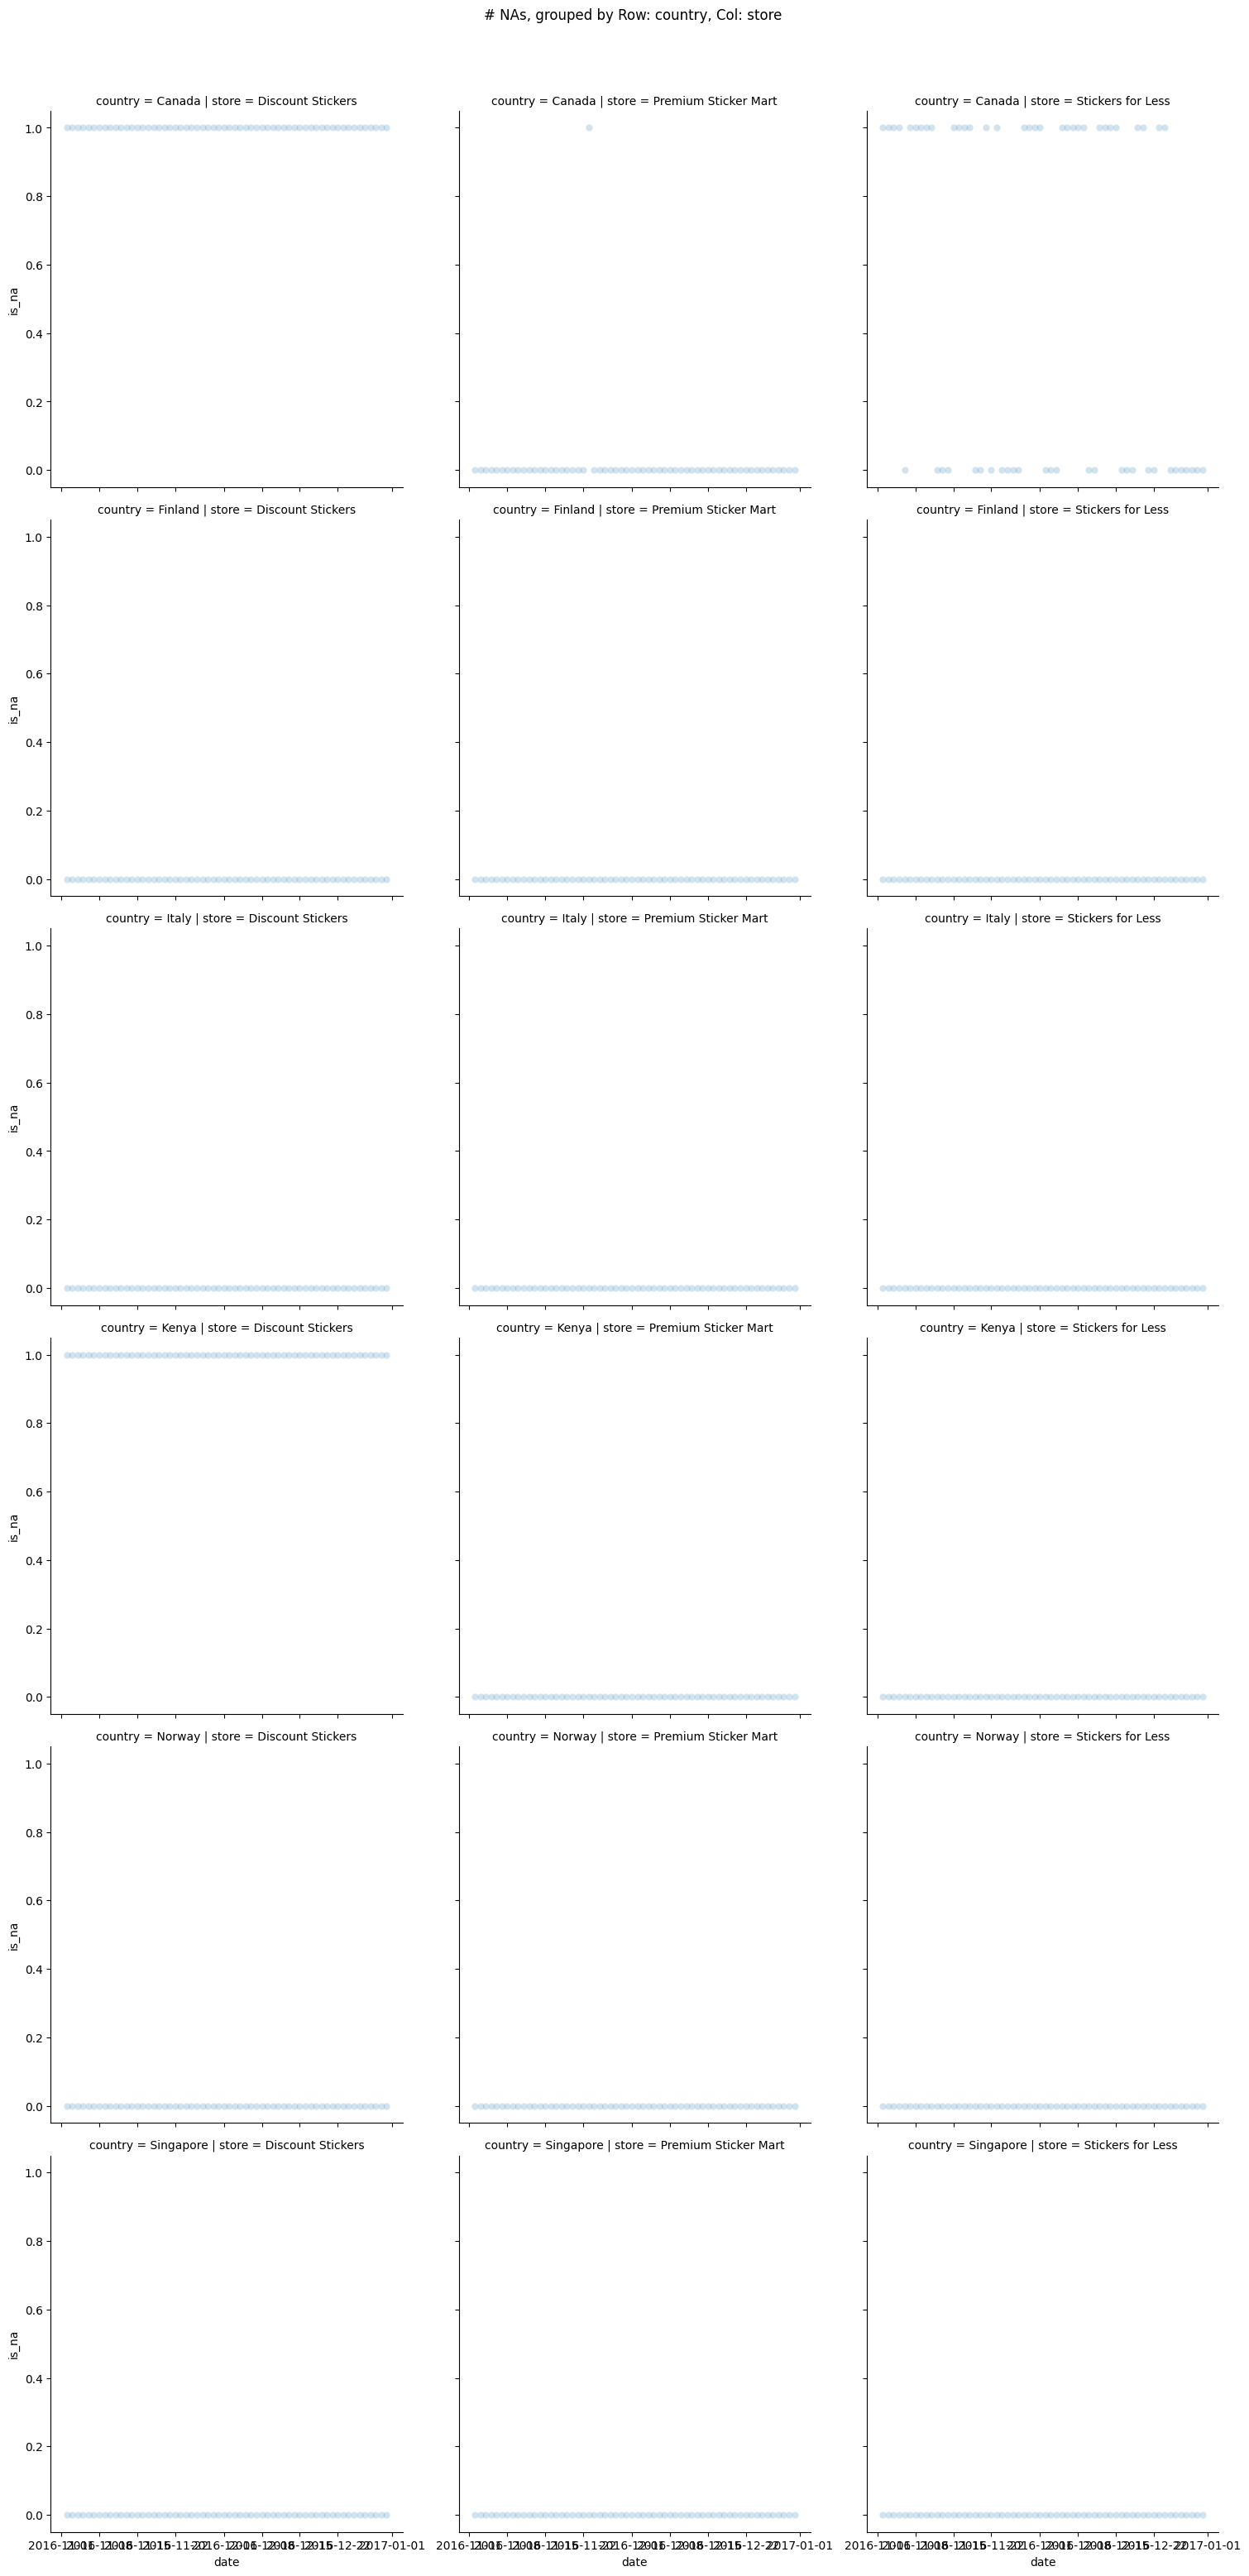

In [7]:
# Graphs
def graph_grouping(df: pd.DataFrame, grouping):
    grouped = df.groupby(grouping + ['date'])['is_na'].sum().reset_index()

    col_group = grouping[0] if len(grouping) >= 1 else None
    row_group = grouping[1] if len(grouping) >= 2 else None
    g = sns.relplot(data=grouped, x='date', y='is_na', col=col_group, row=row_group, alpha=0.2)

    title = 'None'
    if len(grouping) == 1: title=col_group
    if len(grouping) == 2: title=f'Row: {row_group}, Col: {col_group}'
    g.fig.suptitle(f'# NAs, grouped by {title}', y=1.03)
    plt.show()

graph_grouping(train[train.date > pd.to_datetime('2016-11-01')], ['store', 'country'])

<Axes: xlabel='date', ylabel='num_sold'>

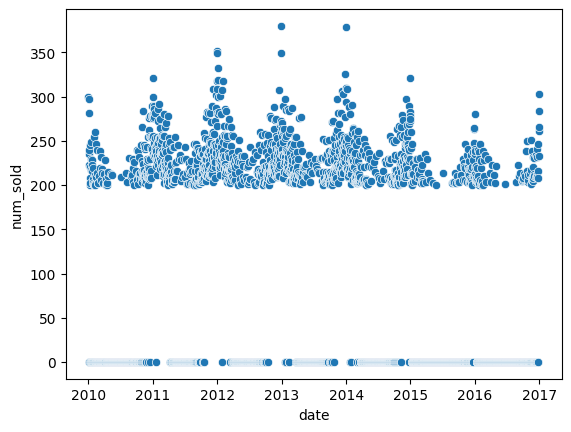

In [ ]:
test_plot = train[(train['product'] == 'Holographic Goose') & (train.country == 'Kenya') & (train.store == 'Stickers for Less')].fillna(0)
sns.scatterplot(data=test_plot, x='date', y='num_sold')

In [17]:
train[(train['product'] == 'Holographic Goose') & (train.country == 'Canada') & (train.store == 'Discount Stickers')]['num_sold'].isna().value_counts()

num_sold
True    2557
Name: count, dtype: int64

Na values seem to be random; they are not "true zeros" - and must be filled appropriately